- crime 데이터를 가지고 시계열 데이터 분석을 진행해 주세요.
- 제공된 컬럼을 가지고 범죄건과 비교해서 시계열 데이터 분석을 진행해 주세요!
- ex) OFFENSE_TYPE_ID 해당 컬럼과 범죄건수와 시계열적인 패턴까지 다 엮어서 어떤식으로 되는지 비교분석이 가능하다.

In [ ]:
import pandas as pd
import datetime
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crime = pd.read_csv('/content/drive/MyDrive/DATA/crime.csv')

In [ ]:
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


- OFFENSE_TYPE_ID(사고 타입)	
- OFFENSE_CATEGORY_ID(사고 카테고리)	
- REPORTED_DATE(발생일)	
- GEO_LON(위도)	
- GEO_LAT(경도)	
- NEIGHBORHOOD_ID(근처 이웃지역)	
- IS_CRIME(범죄수)	
- IS_TRAFFIC(교통사고수)


In [ ]:
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])
crime.set_index('REPORTED_DATE', inplace = True)
crime.sort_index(inplace = True)
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


- 사고 카테고리 건수

In [ ]:
crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: OFFENSE_CATEGORY_ID, dtype: int64

- 사고 타입 건수 

In [ ]:
crime['OFFENSE_TYPE_ID'].value_counts()

traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
                                ...  
riot                                1
homicide-police-by-gun              1
theft-from-yards                    1
theft-of-cable-services             1
explosives-posses                   1
Name: OFFENSE_TYPE_ID, Length: 196, dtype: int64

### 연도별 범죄 건수 추이

<Axes: xlabel='REPORTED_DATE'>

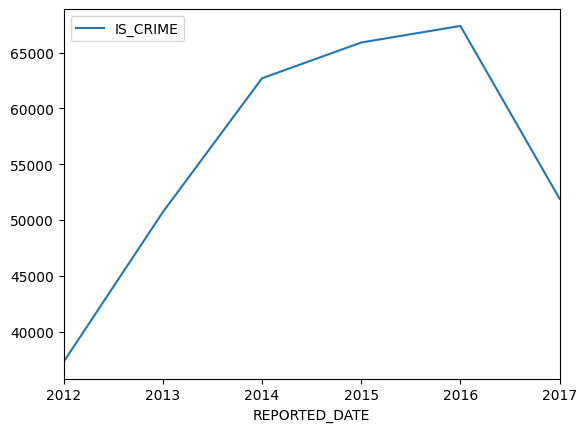

In [ ]:
crime[['IS_CRIME']].resample('Y').sum().plot()

- 2016년에 가장 많은 범죄건수 발생

### 2016년 가장 많이 발생한 범죄 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crime[['OFFENSE_CATEGORY_ID']].loc['2016'].value_counts()

OFFENSE_CATEGORY_ID         
traffic-accident                23695
all-other-crimes                16433
public-disorder                  9842
larceny                          9052
theft-from-motor-vehicle         6512
drug-alcohol                     6076
auto-theft                       4800
burglary                         4656
other-crimes-against-persons     4621
aggravated-assault               2139
white-collar-crime               1232
robbery                          1151
sexual-assault                    722
arson                              92
murder                             53
dtype: int64

<Axes: xlabel='OFFENSE_CATEGORY_ID'>

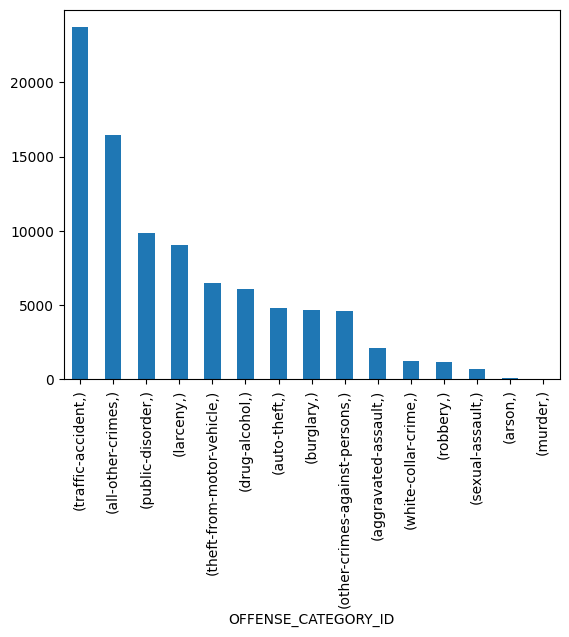

In [ ]:
crime[['OFFENSE_CATEGORY_ID']].loc['2016'].value_counts().plot.bar()

- traffic-accident가 가장 많이 발생

### 2012년 가장 많이 발생한 범죄 확인

<Axes: xlabel='OFFENSE_CATEGORY_ID'>

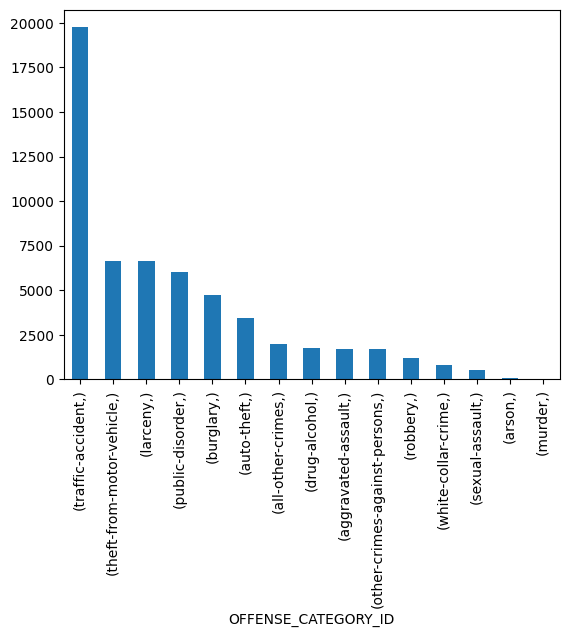

In [ ]:
crime[['OFFENSE_CATEGORY_ID']].loc['2012'].value_counts().plot.bar()

- 범죄가 가장 적었던 2012년에도 앞도적으로 교통사고가 가장 많았던 것을 확인할 수 있다.

### 연도별 교통사고 건수 추이

<Axes: xlabel='REPORTED_DATE'>

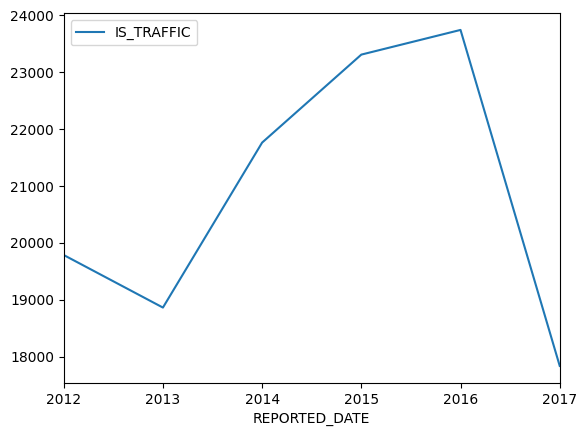

In [ ]:
crime[['IS_TRAFFIC']].resample('Y').sum().plot()

- 앞서 2016년 범죄건수에서 교통사고가 제일 많았던 것을 확인할 수 있었고, 연도별 교통사고도 2016년이 제일 많이 발생했던 것을 알 수 있다.

### 교통사고가 제일 적은 2013년에서 교통사고를 제외한 가장 많이 발생한 사고

<Axes: xlabel='OFFENSE_CATEGORY_ID'>

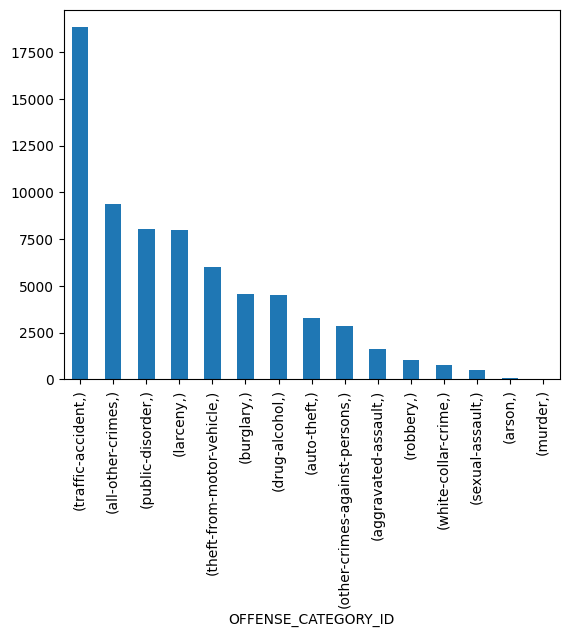

In [ ]:
crime[['OFFENSE_CATEGORY_ID']].loc['2013'].value_counts().plot.bar()

- 다른 범죄가 2번째로 나왔으나 교통사고가 압도적인것을 확인할 수 있다.

### 사고가 가장 많이 발생한 2016년 월별 사고 추이

<Axes: xlabel='REPORTED_DATE'>

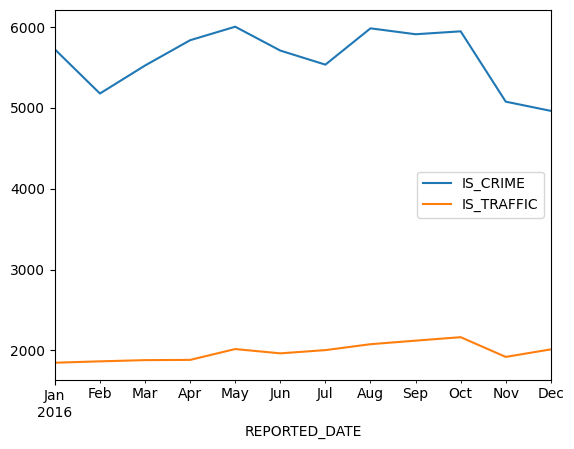

In [ ]:
crime[['IS_CRIME','IS_TRAFFIC']].loc['2016'].resample('M').sum().plot()

### 2016년 월별 범죄 추이

In [ ]:
category = crime['OFFENSE_CATEGORY_ID'].value_counts().index.to_list()
category

['traffic-accident',
 'all-other-crimes',
 'public-disorder',
 'larceny',
 'theft-from-motor-vehicle',
 'drug-alcohol',
 'burglary',
 'auto-theft',
 'other-crimes-against-persons',
 'aggravated-assault',
 'robbery',
 'white-collar-crime',
 'sexual-assault',
 'arson',
 'murder']

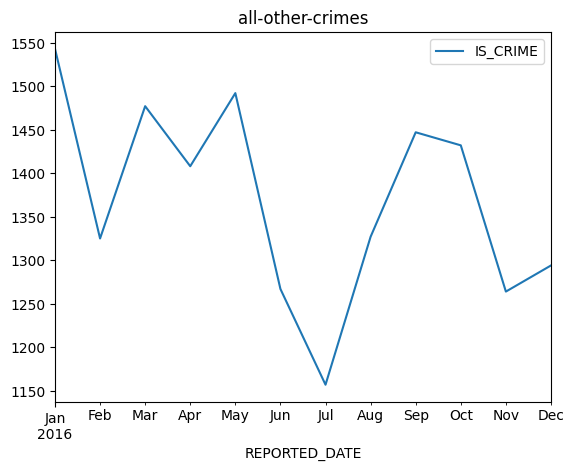

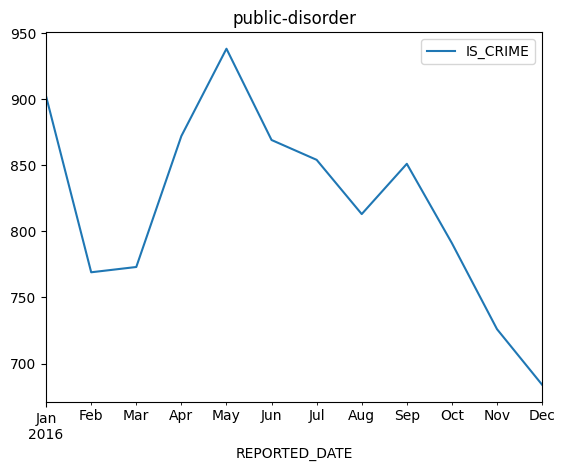

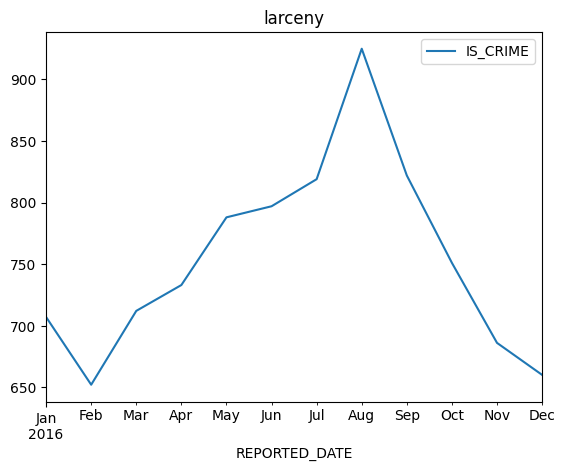

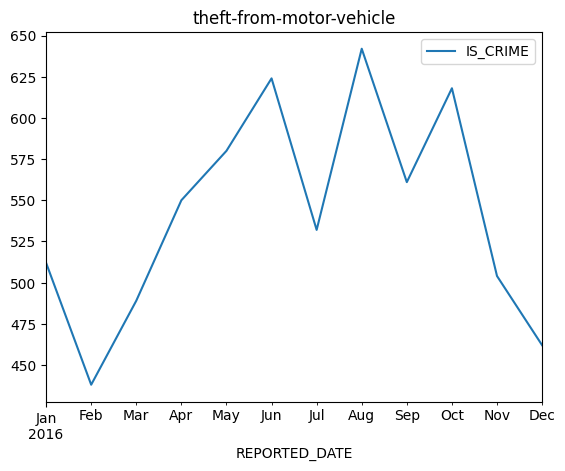

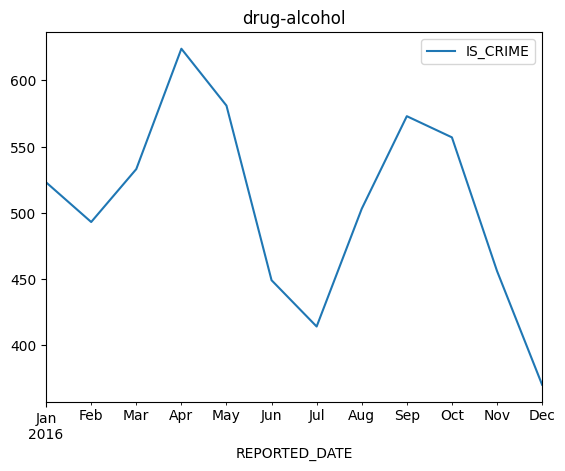

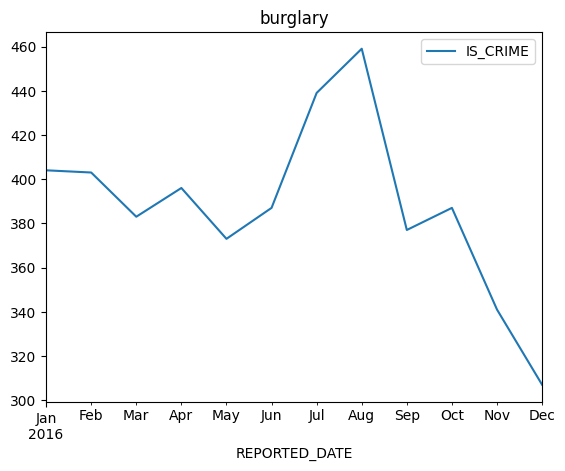

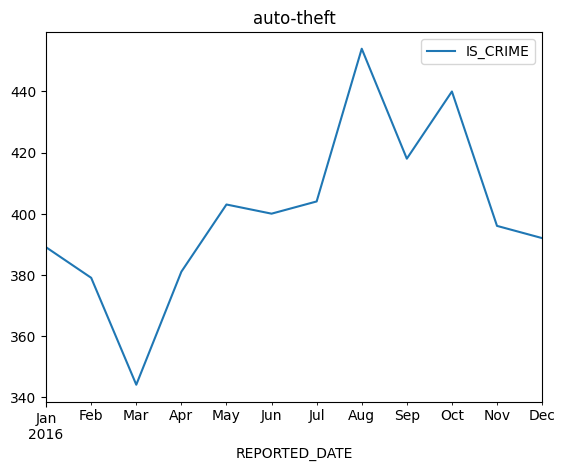

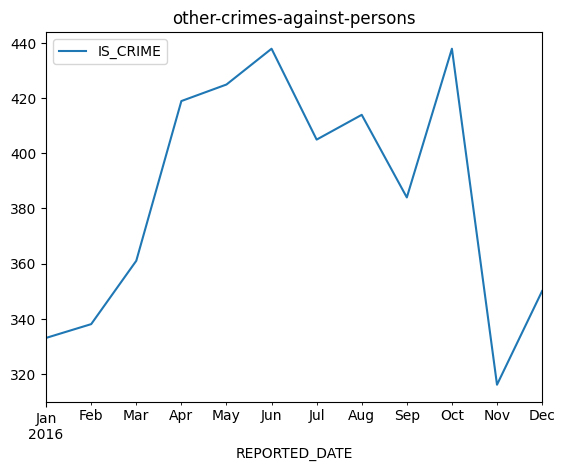

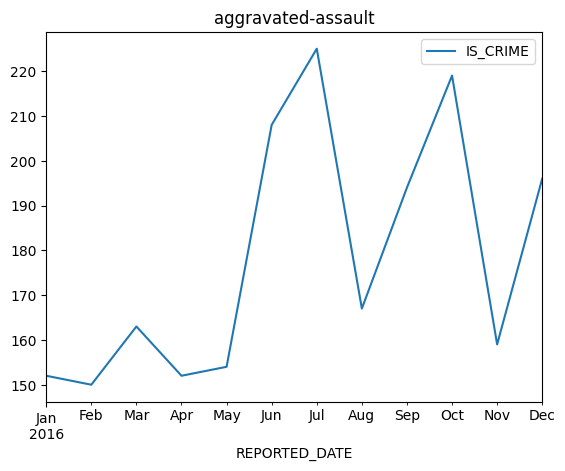

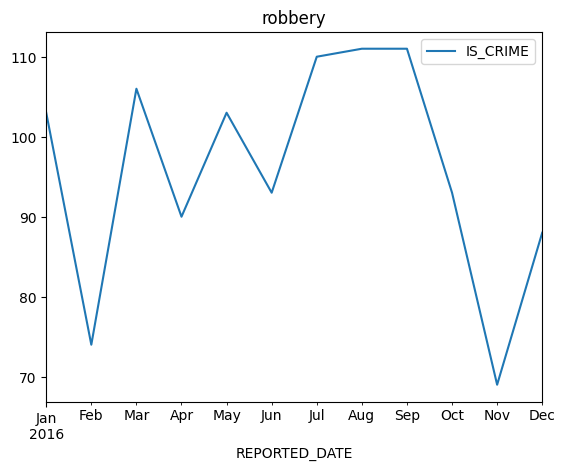

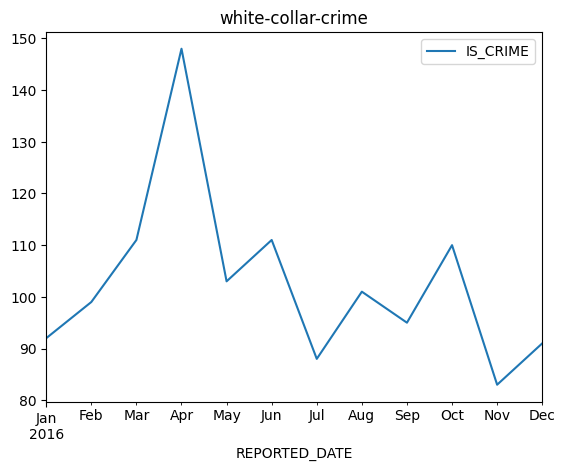

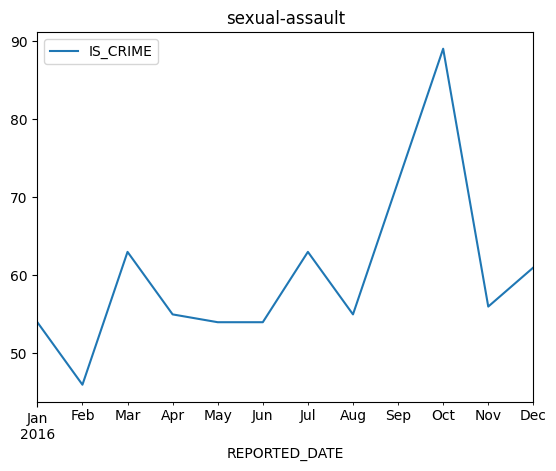

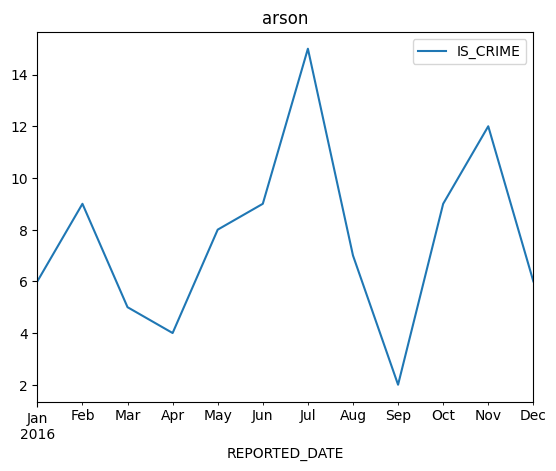

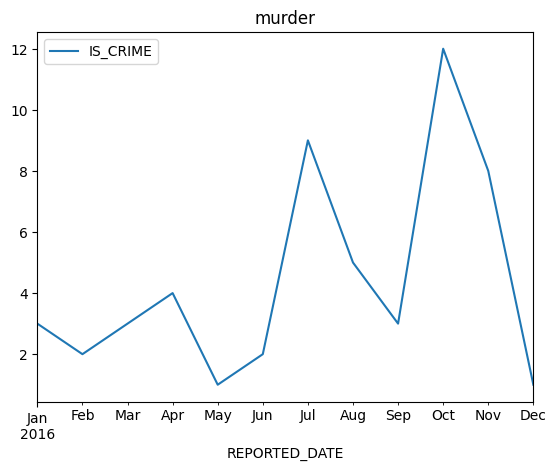

In [ ]:
for c in category[1:] :
  crime[crime['OFFENSE_CATEGORY_ID']==c][['IS_CRIME']].loc['2016'].resample("M").sum().plot()
  plt.title(c)

### 2016년 요일별 범죄 건수 추이

In [ ]:
crime['DAYOFWEEK']  = crime.index.strftime('%a')
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,DAYOFWEEK
REPORTED_DATE,,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0,Mon
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0,Mon
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,Mon
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,Mon
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0,Mon
...,...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0,Fri
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0,Fri
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0,Fri


<Axes: xlabel='DAYOFWEEK'>

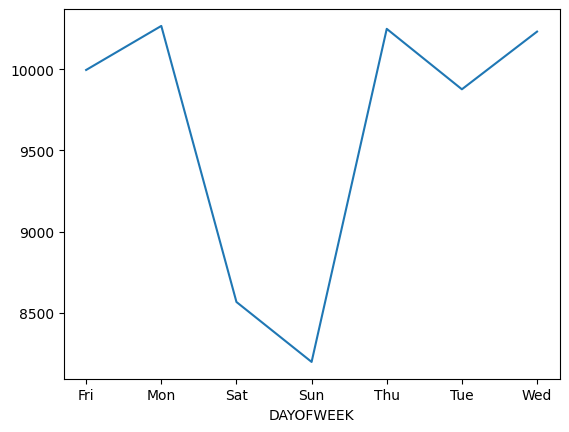

In [ ]:
crime.loc['2016'].groupby('DAYOFWEEK')['IS_CRIME'].sum().plot()

### 2016년 교통사고 요일별 추이

<Axes: xlabel='DAYOFWEEK'>

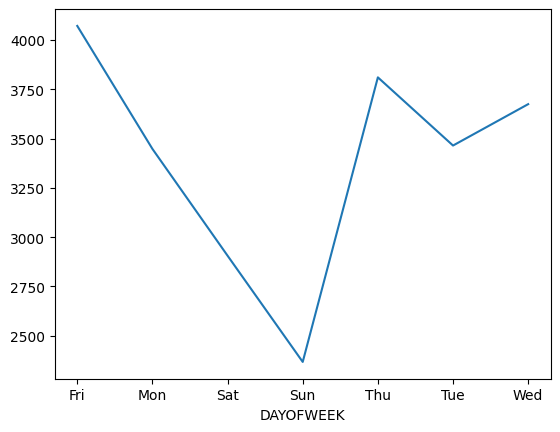

In [ ]:
crime.loc['2016'].groupby('DAYOFWEEK')['IS_TRAFFIC'].sum().plot()

### 요일별 교통사고, 범죄건수 추이

<Axes: xlabel='DAYOFWEEK'>

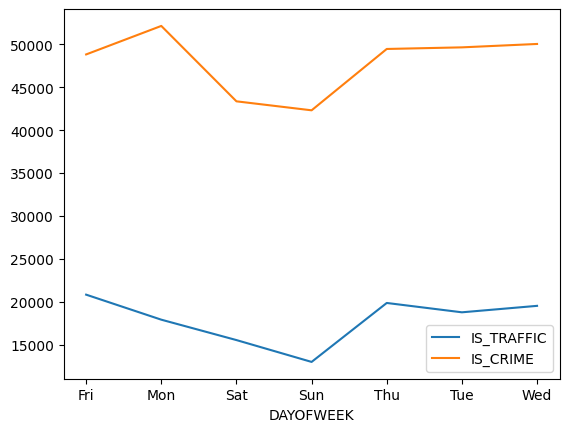

In [ ]:
crime.groupby('DAYOFWEEK')[['IS_TRAFFIC','IS_CRIME']].sum().plot()

### 연도별 지역 범죄 건수 추이

In [ ]:
neighbor = crime['NEIGHBORHOOD_ID'].value_counts().index.to_list()
neighbor

['five-points',
 'stapleton',
 'cbd',
 'capitol-hill',
 'montbello',
 'baker',
 'lincoln-park',
 'westwood',
 'east-colfax',
 'union-station',
 'civic-center',
 'gateway-green-valley-ranch',
 'west-colfax',
 'highland',
 'north-capitol-hill',
 'hampden-south',
 'northeast-park-hill',
 'speer',
 'athmar-park',
 'elyria-swansea',
 'hampden',
 'cheesman-park',
 'washington-virginia-vale',
 'globeville',
 'mar-lee',
 'sunnyside',
 'villa-park',
 'ruby-hill',
 'college-view-south-platte',
 'barnum',
 'cherry-creek',
 'dia',
 'city-park-west',
 'harvey-park',
 'congress-park',
 'virginia-village',
 'berkeley',
 'washington-park-west',
 'west-highland',
 'auraria',
 'overland',
 'university',
 'jefferson-park',
 'sun-valley',
 'university-hills',
 'goldsmith',
 'montclair',
 'harvey-park-south',
 'sloan-lake',
 'cole',
 'lowry-field',
 'south-park-hill',
 'windsor',
 'hale',
 'north-park-hill',
 'valverde',
 'marston',
 'washington-park',
 'platt-park',
 'clayton',
 'university-park',
 'bear-

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


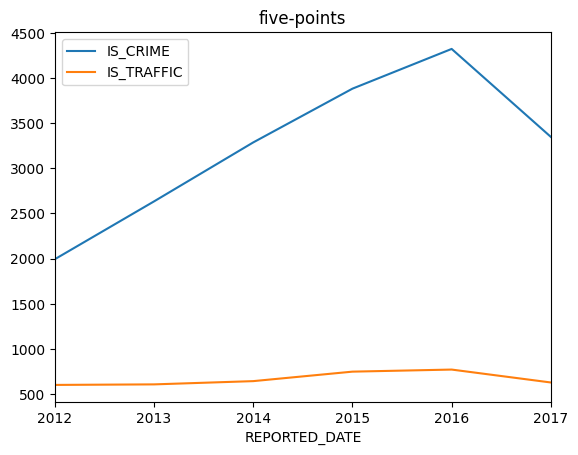

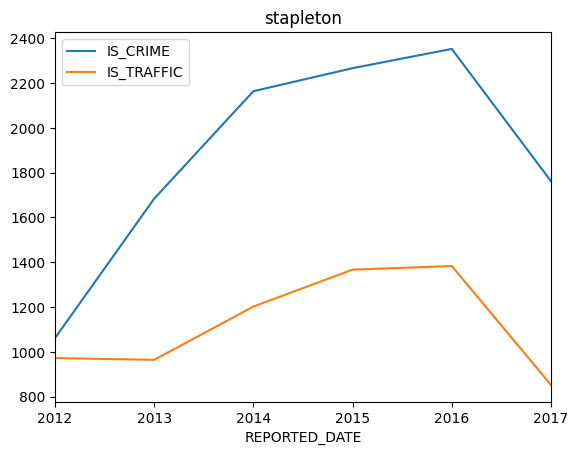

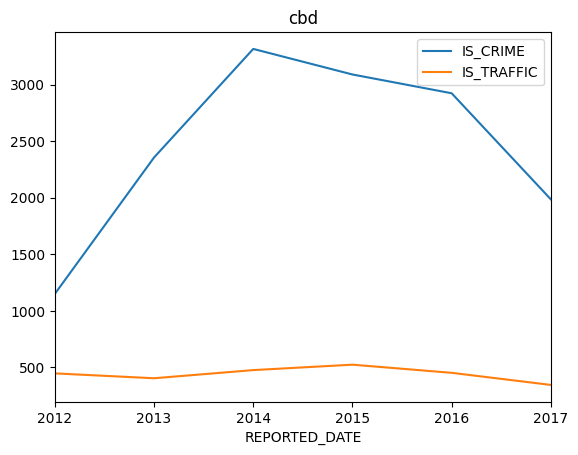

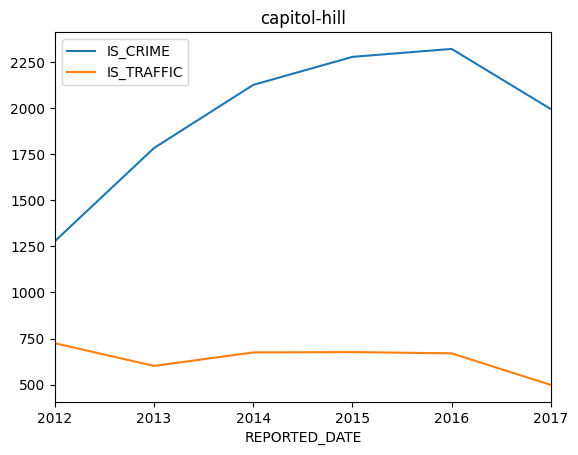

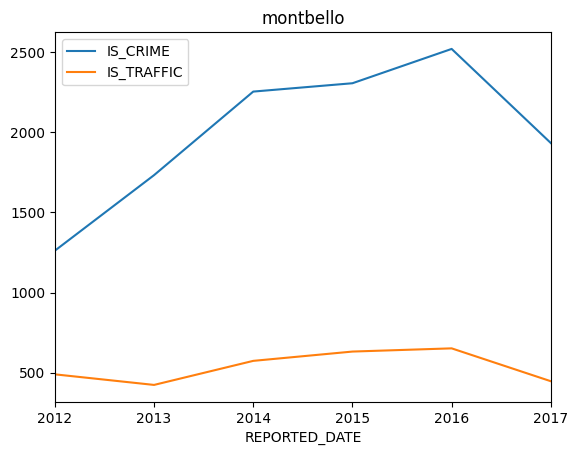

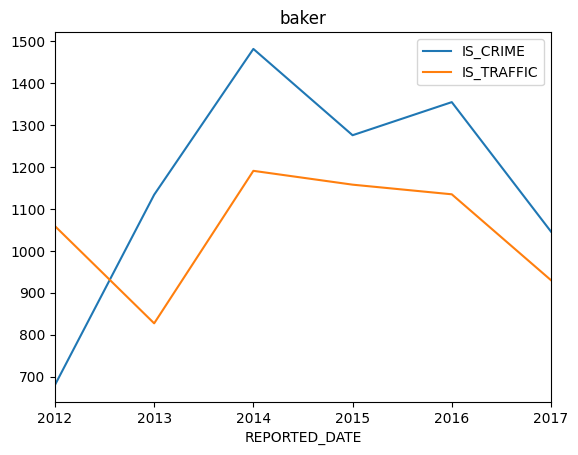

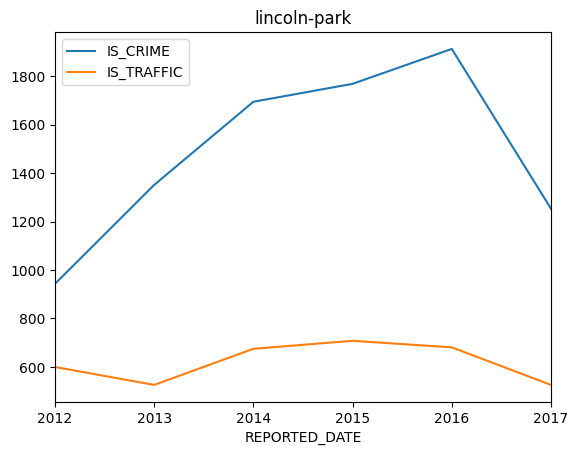

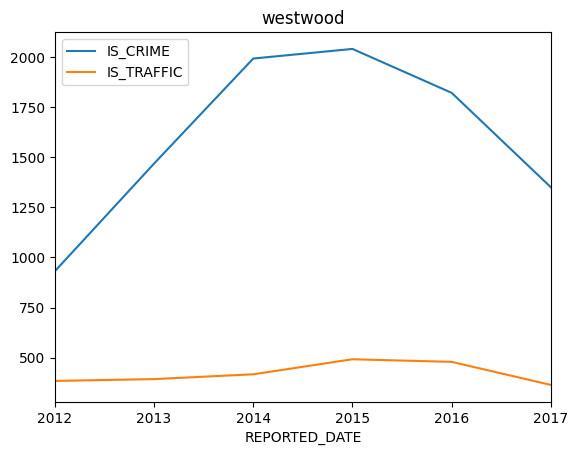

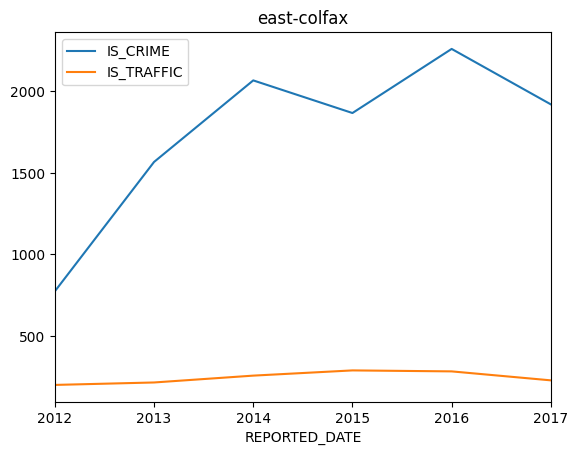

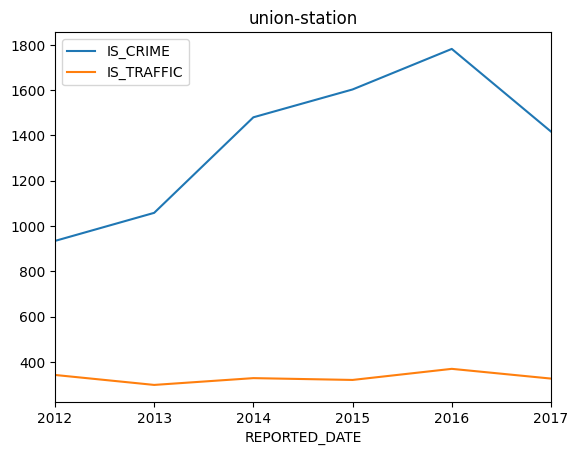

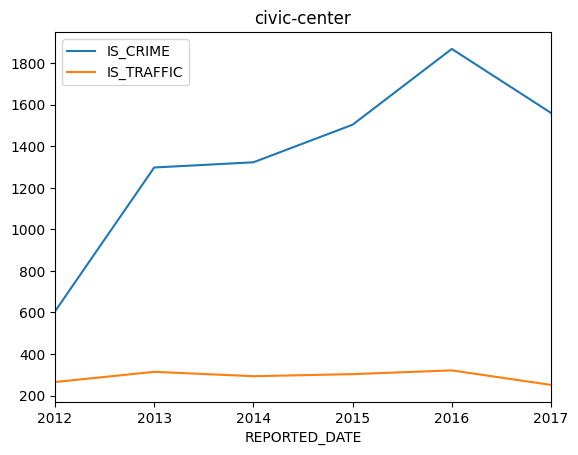

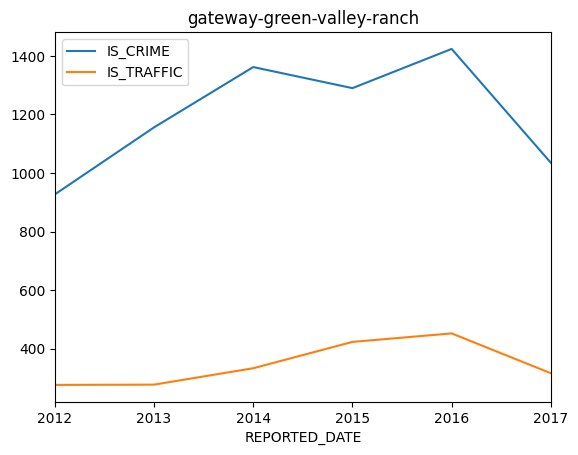

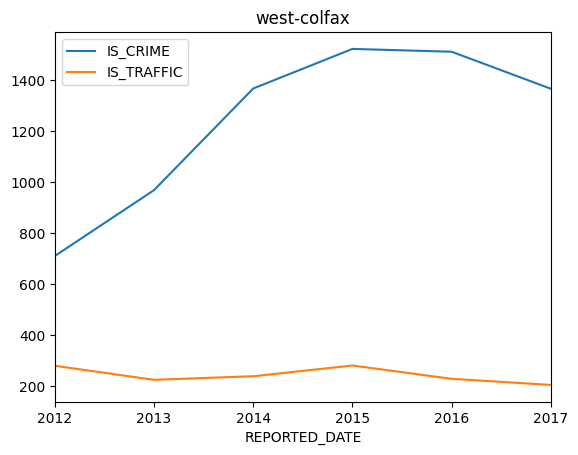

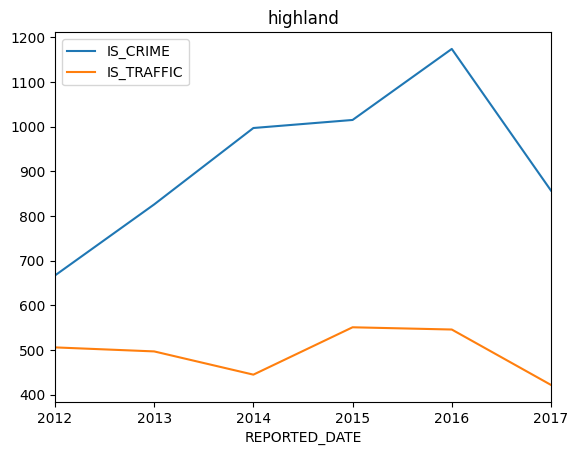

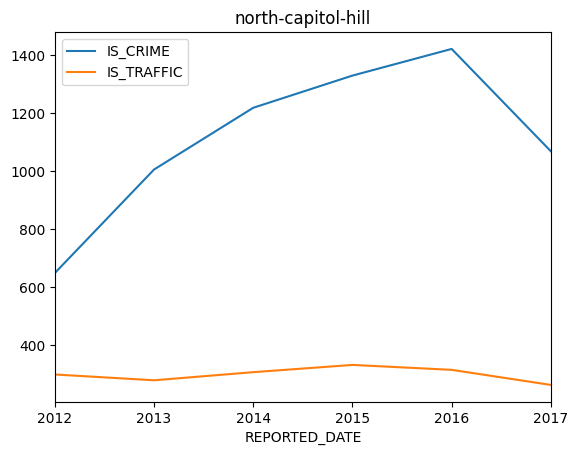

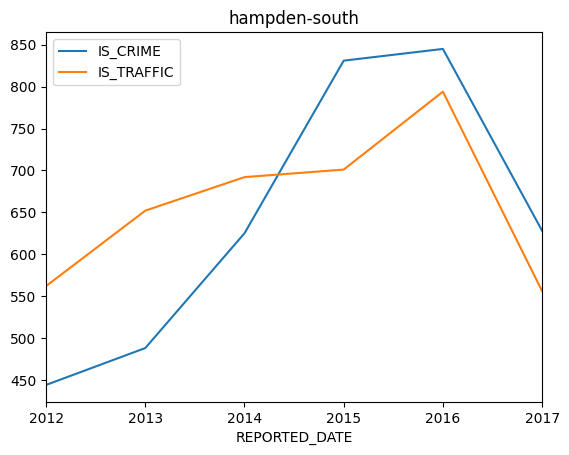

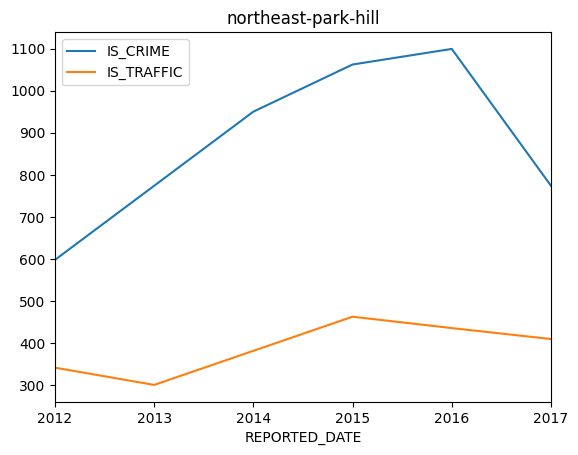

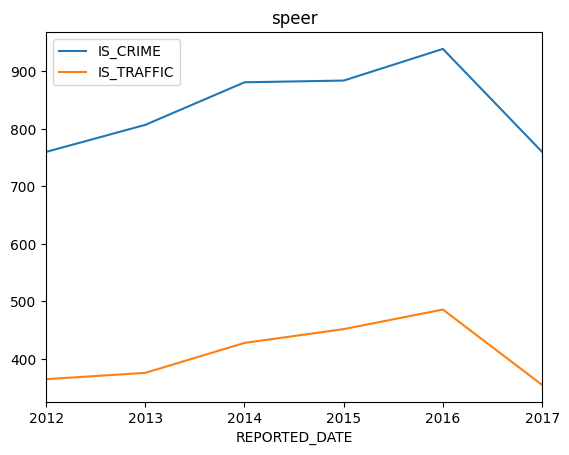

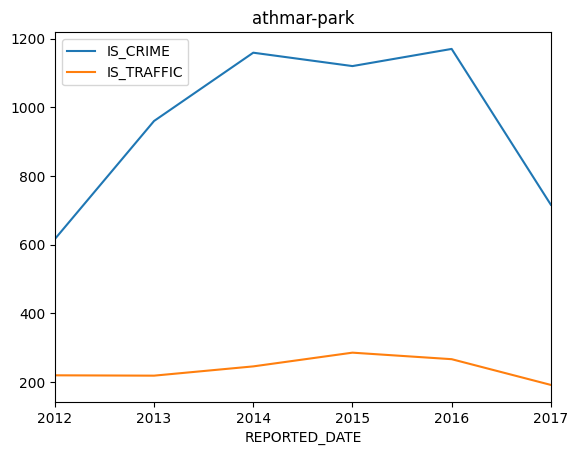

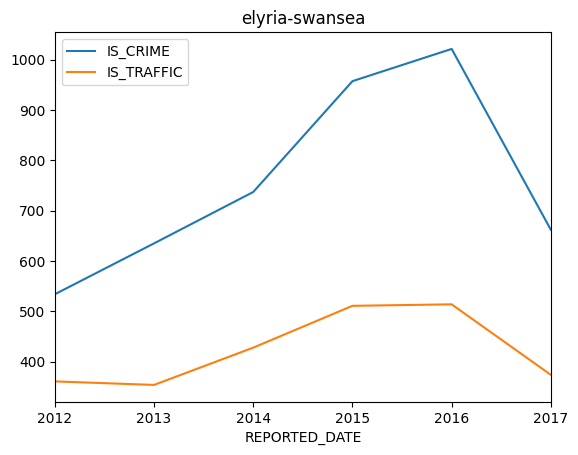

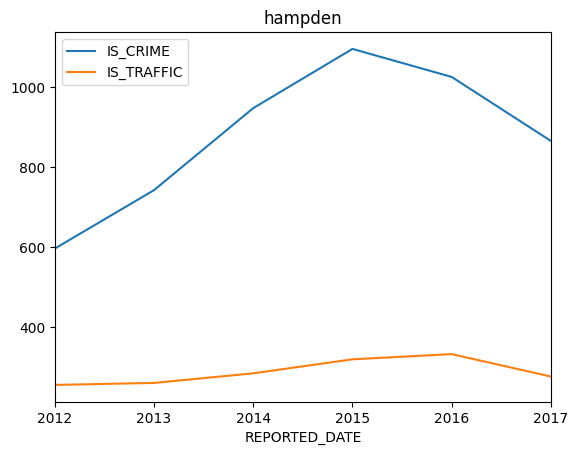

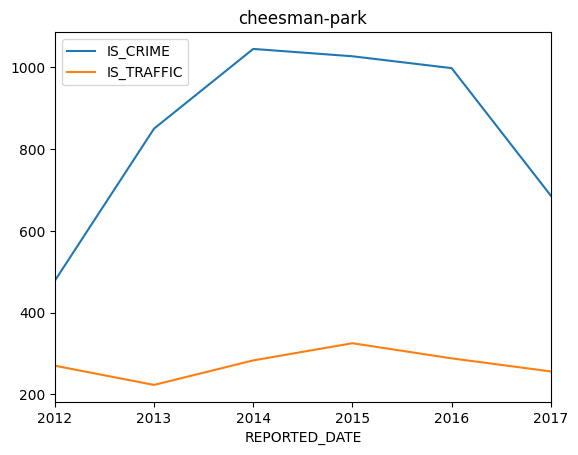

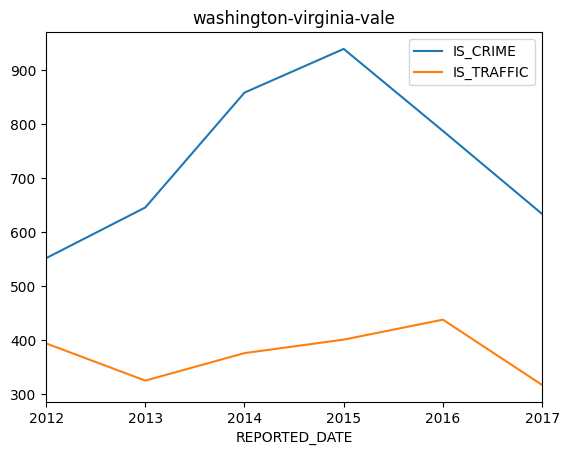

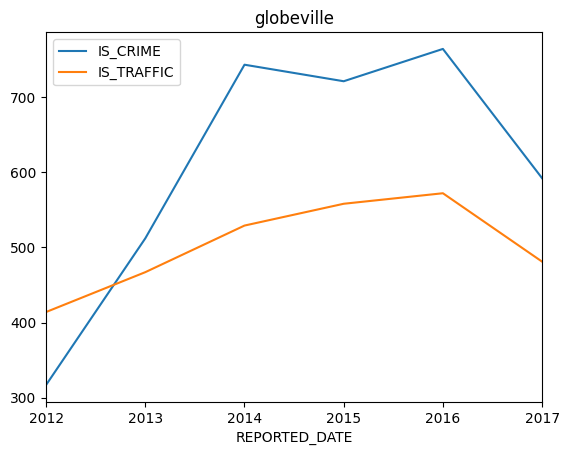

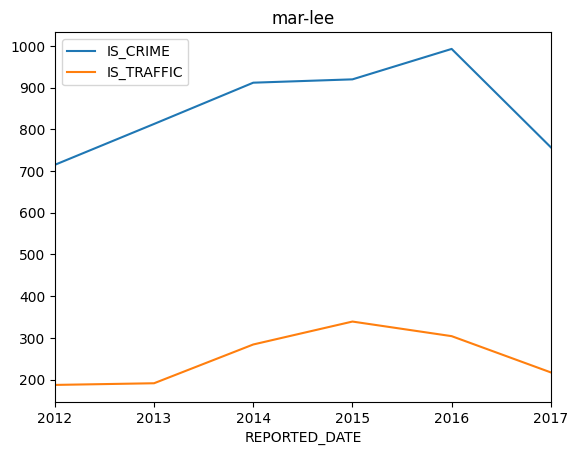

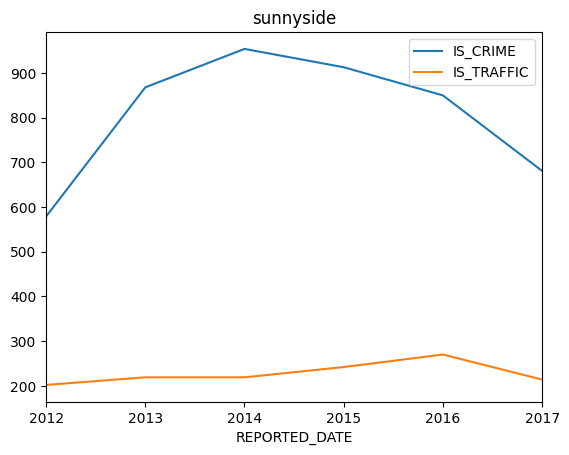

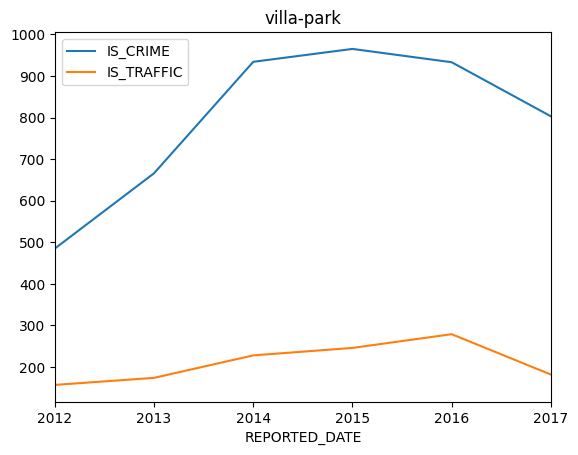

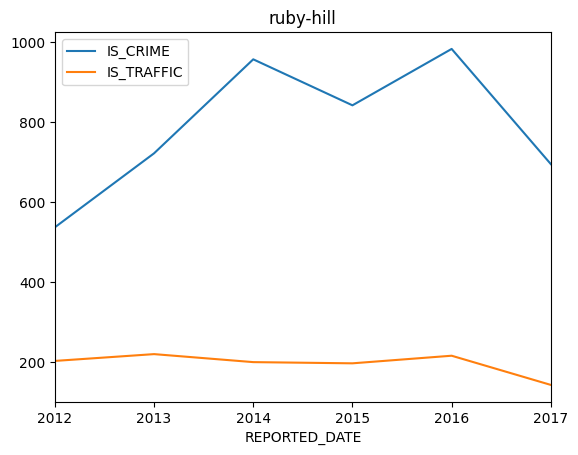

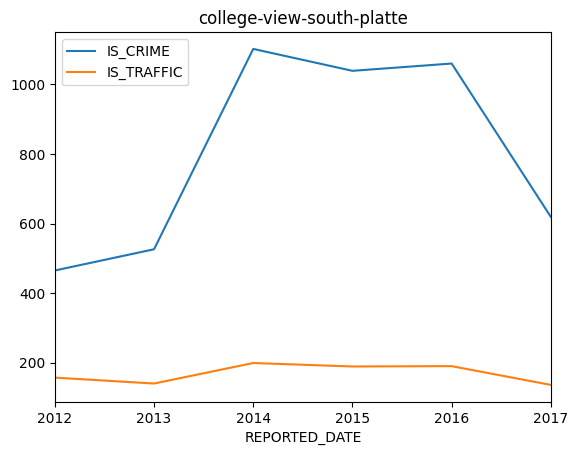

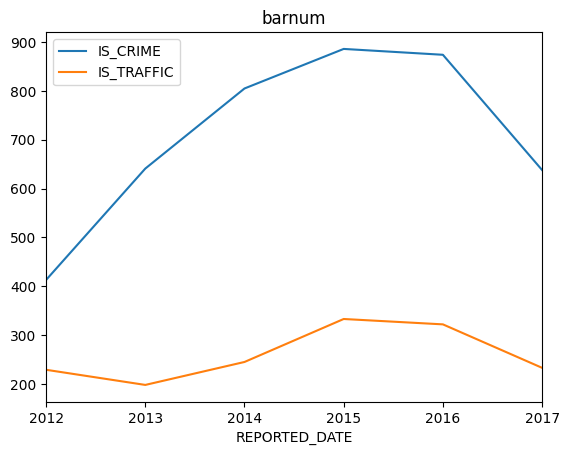

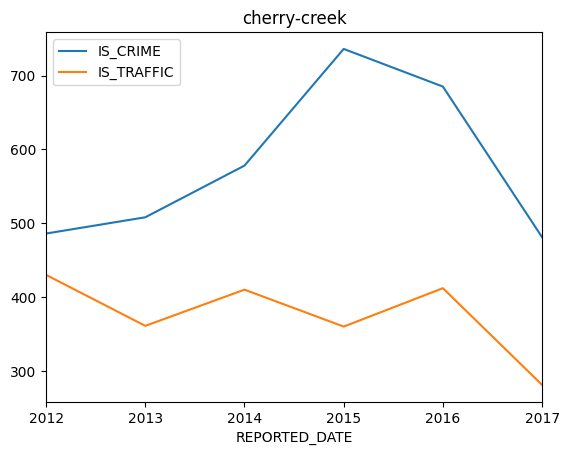

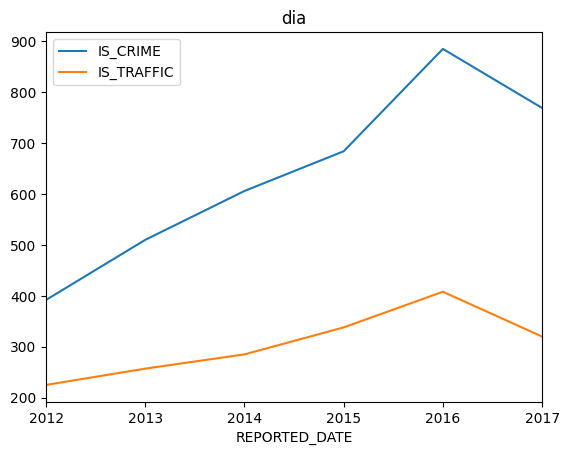

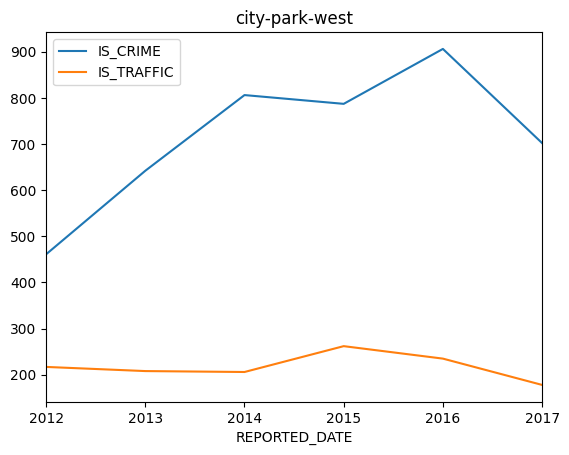

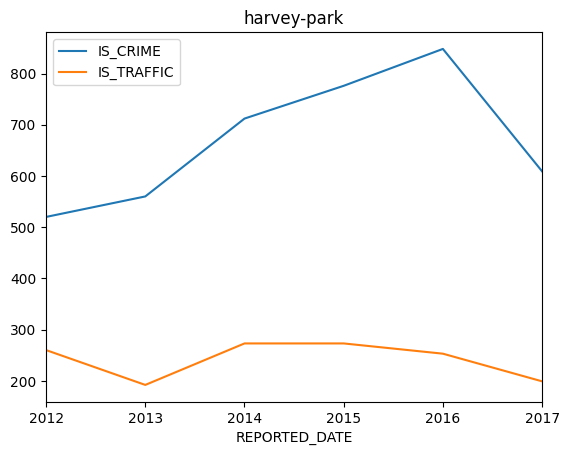

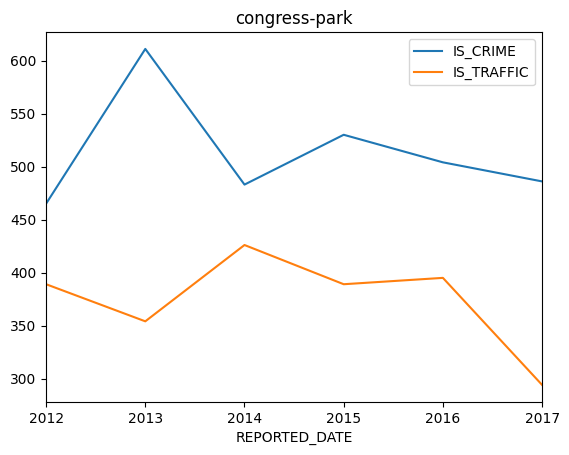

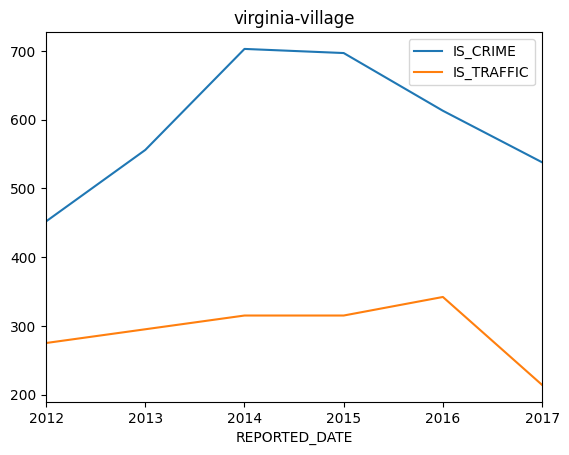

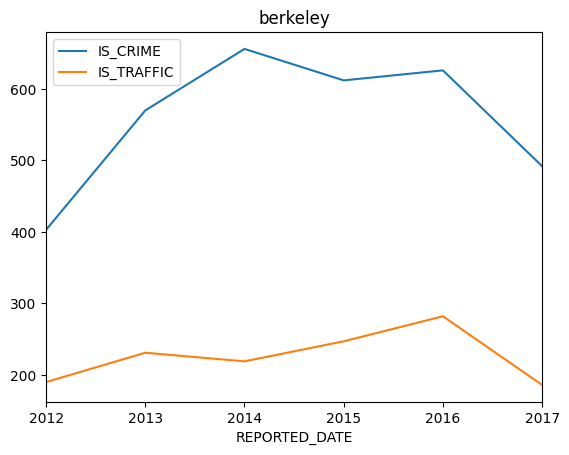

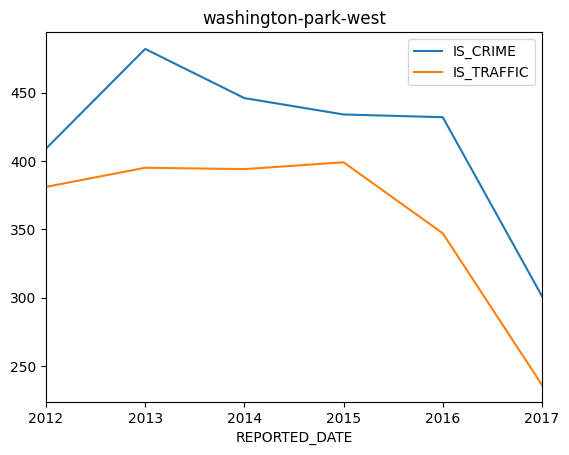

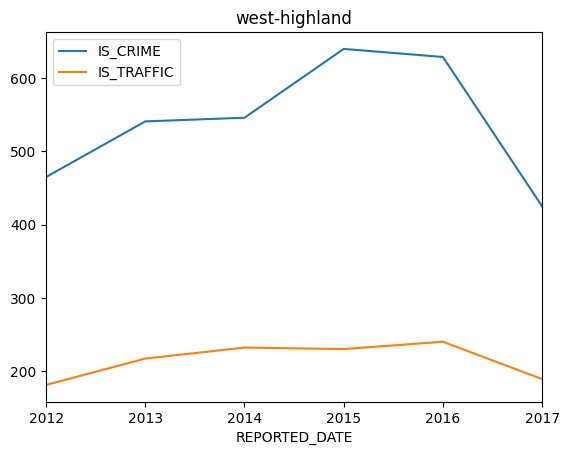

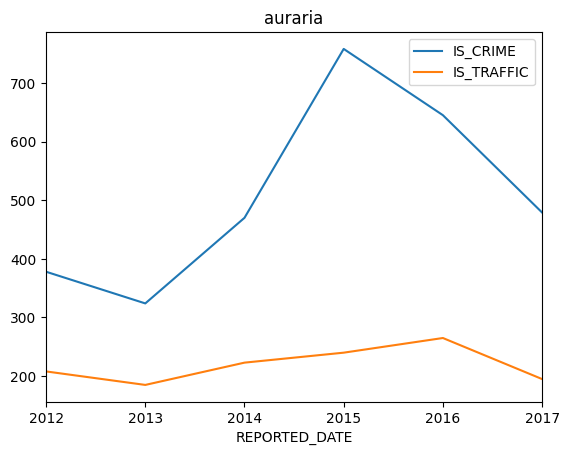

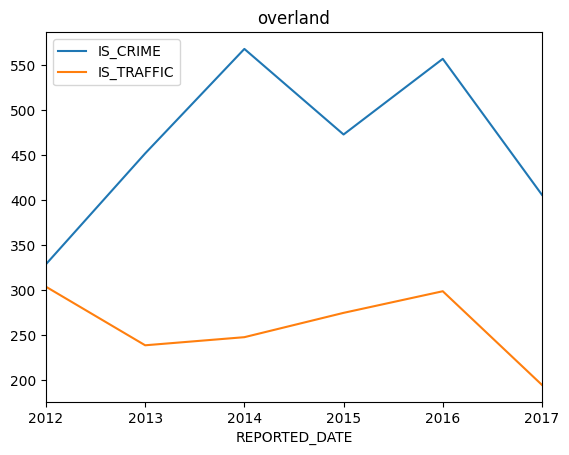

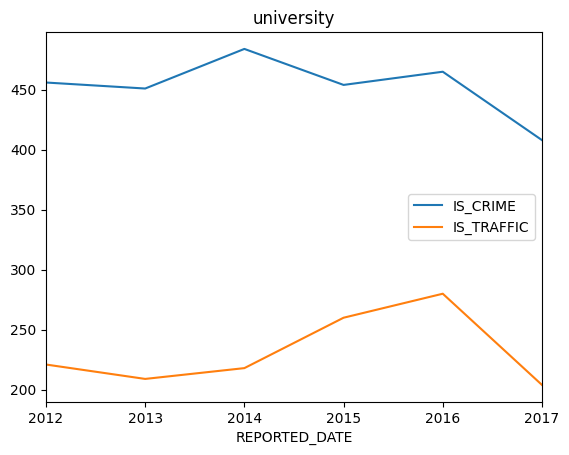

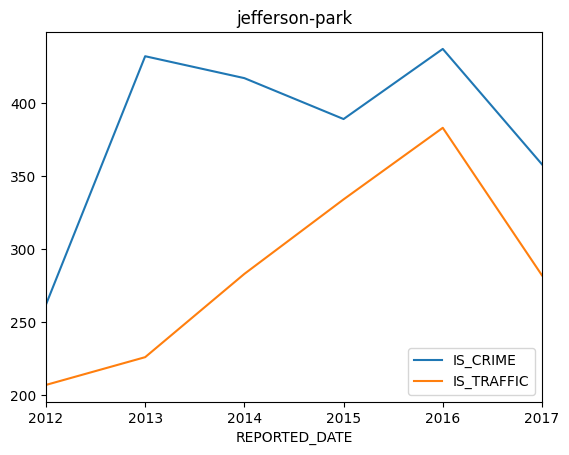

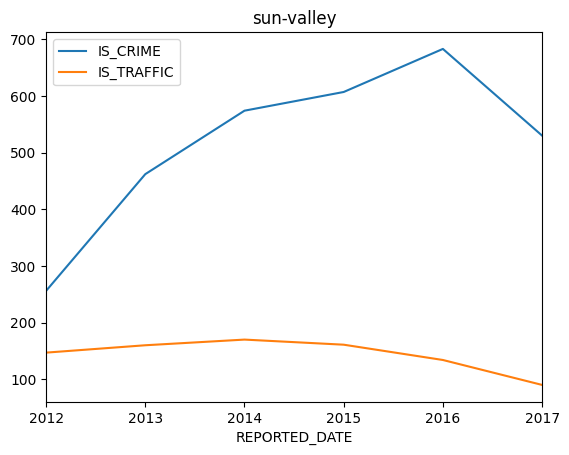

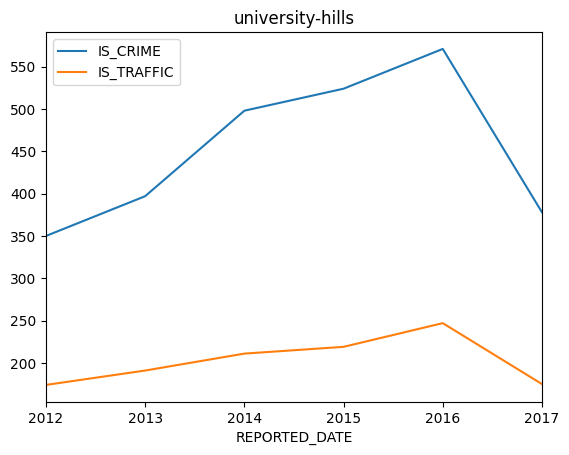

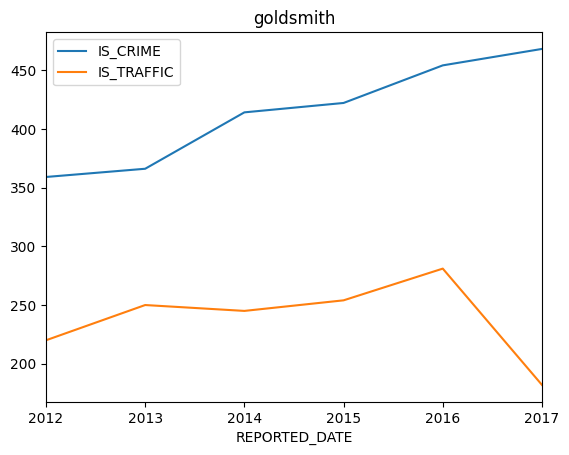

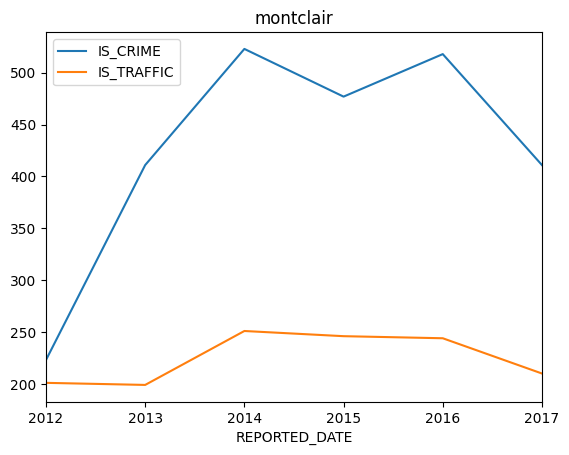

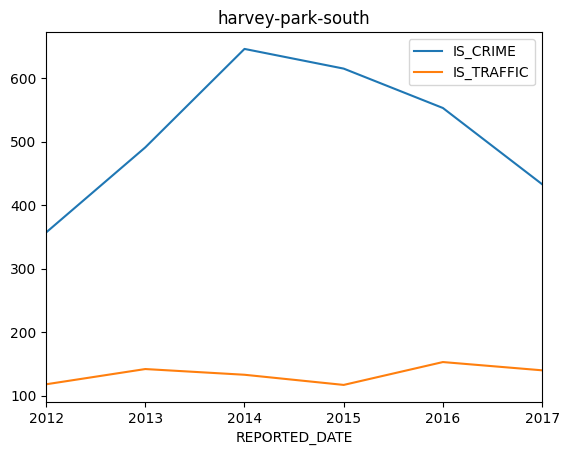

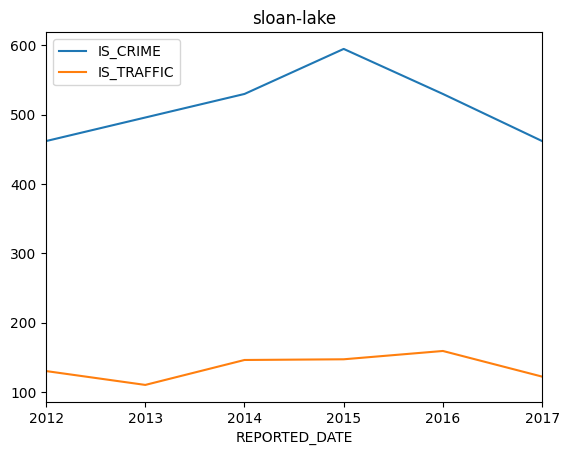

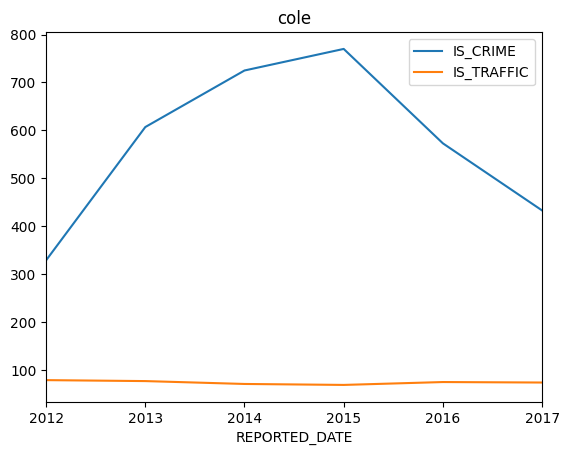

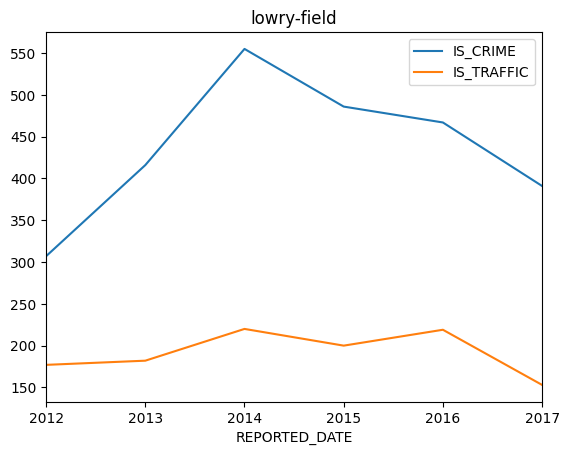

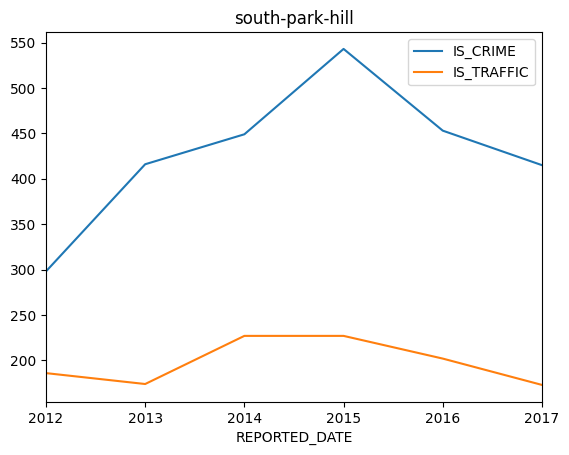

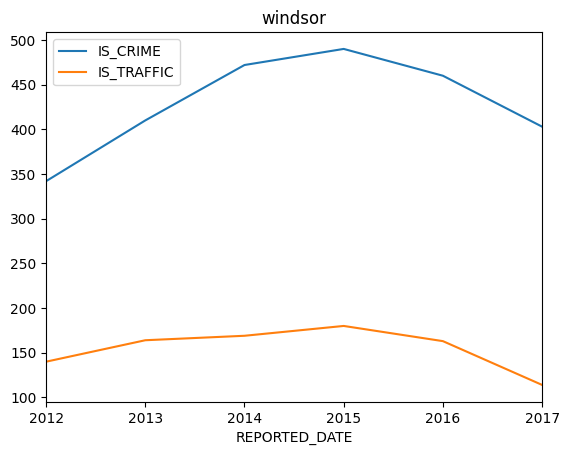

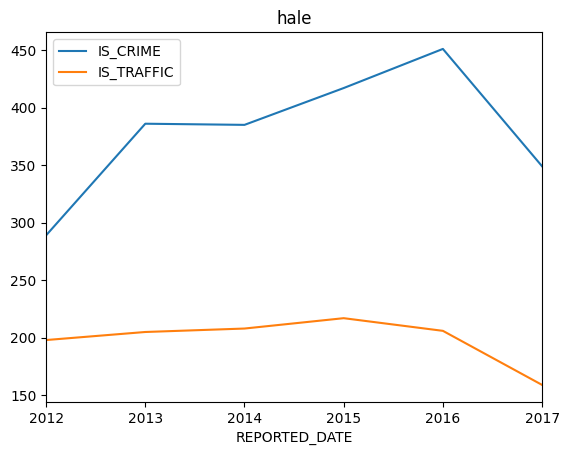

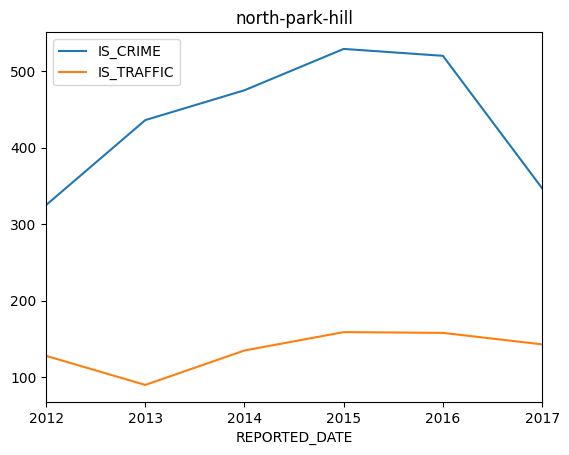

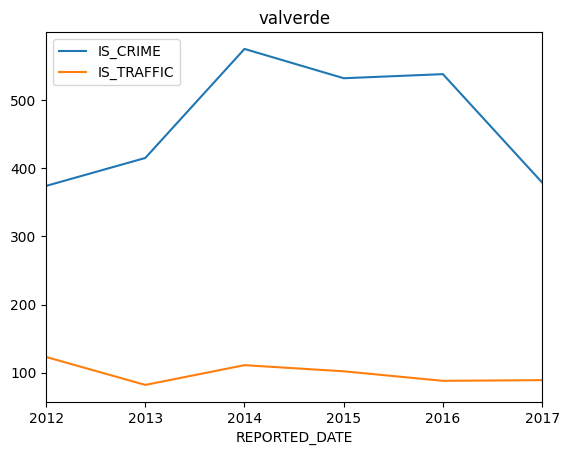

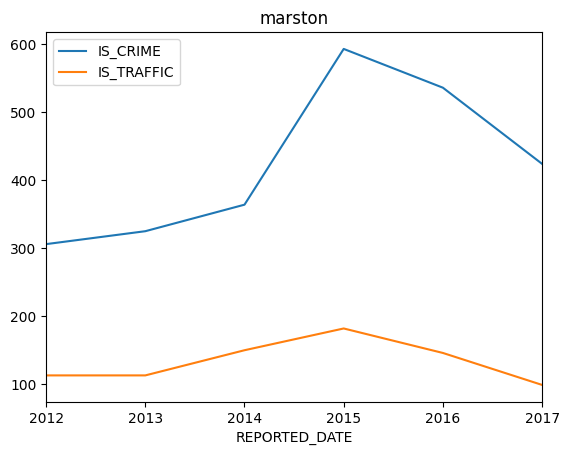

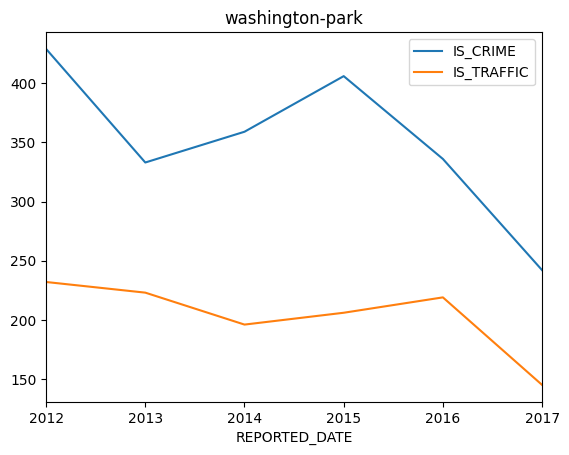

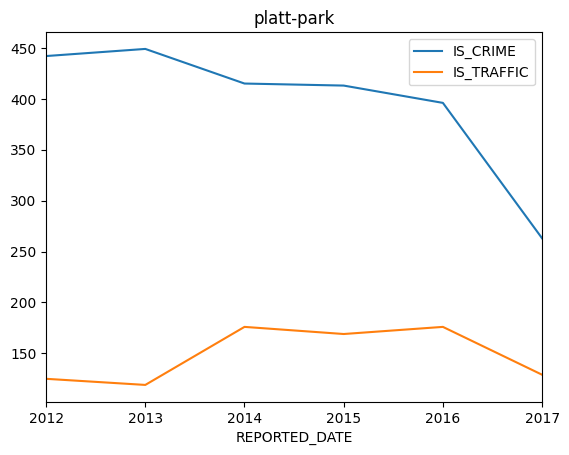

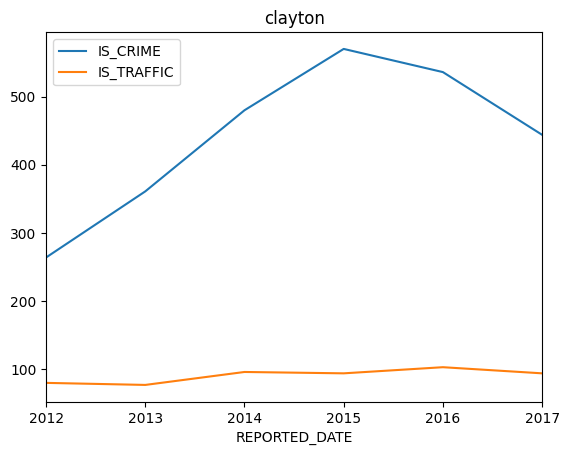

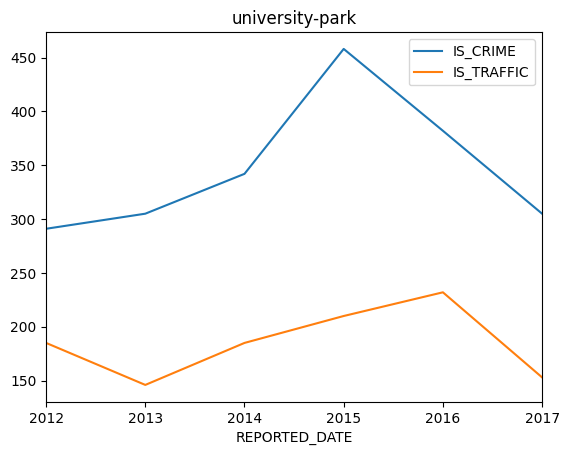

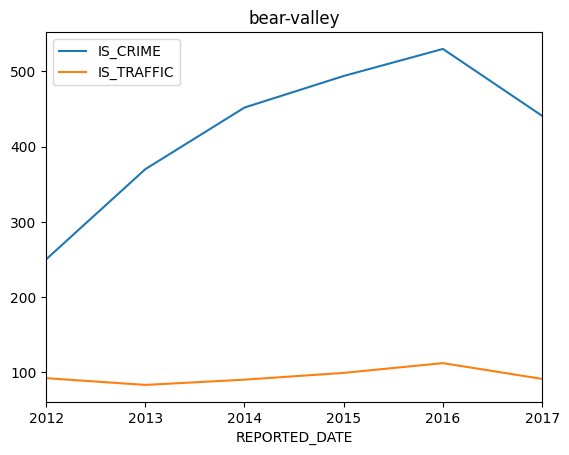

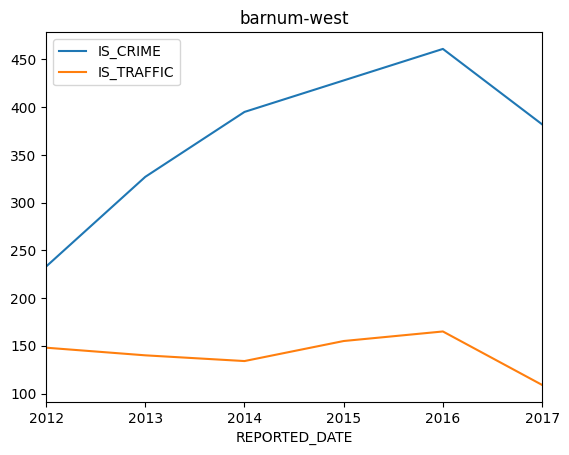

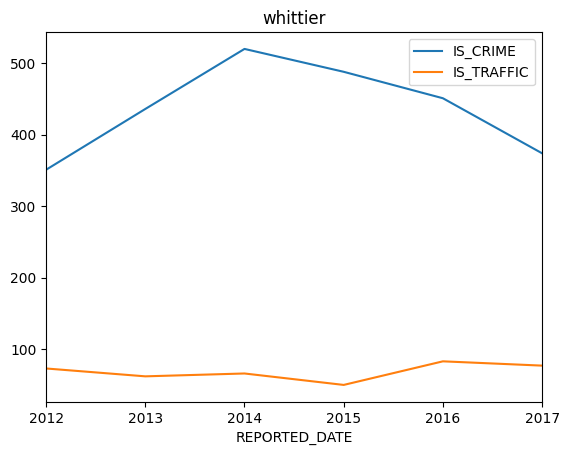

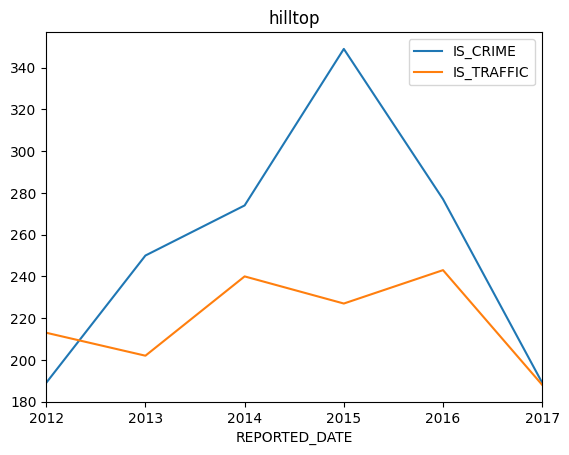

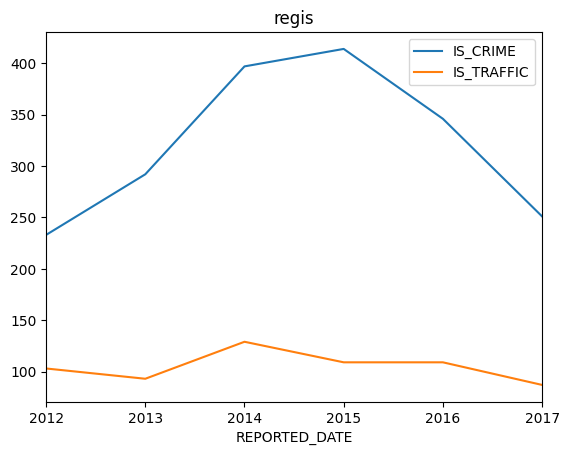

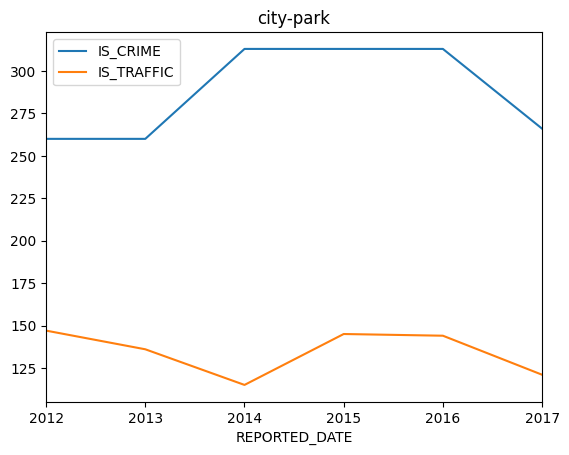

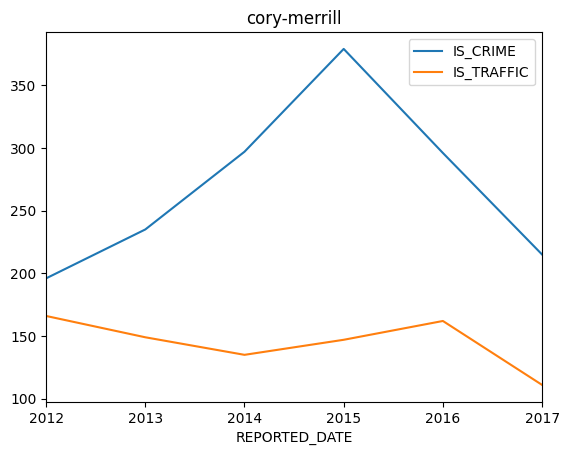

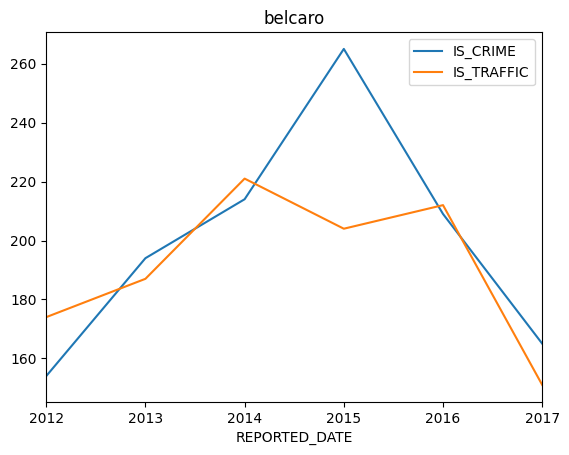

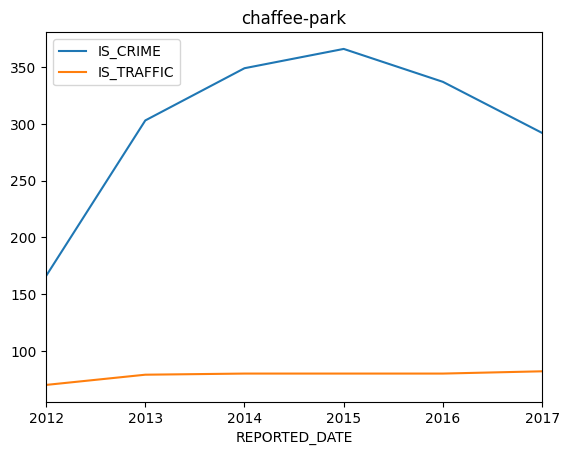

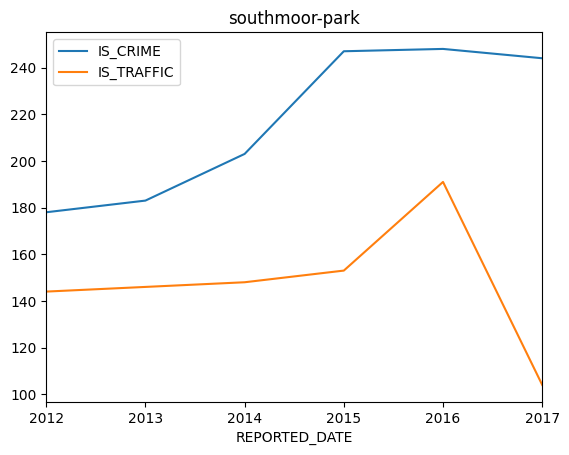

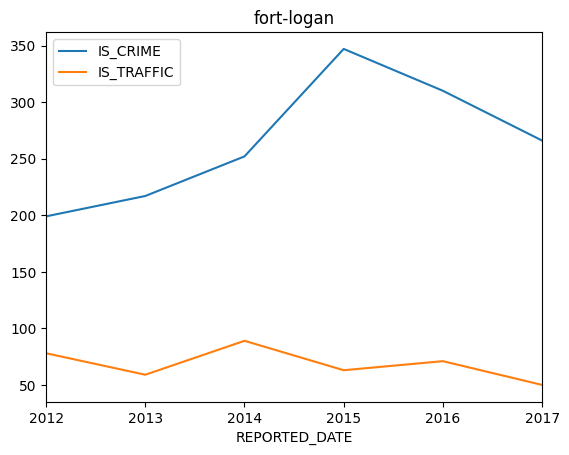

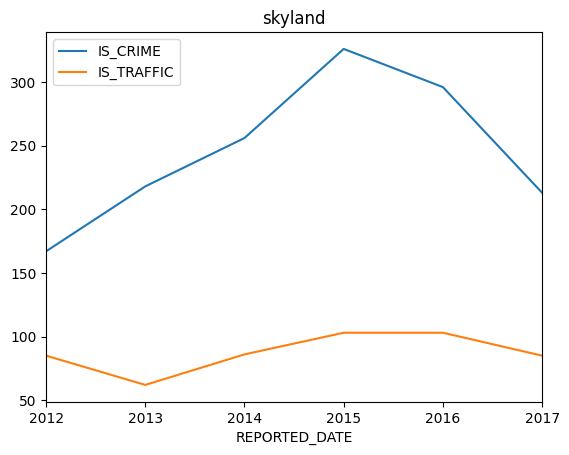

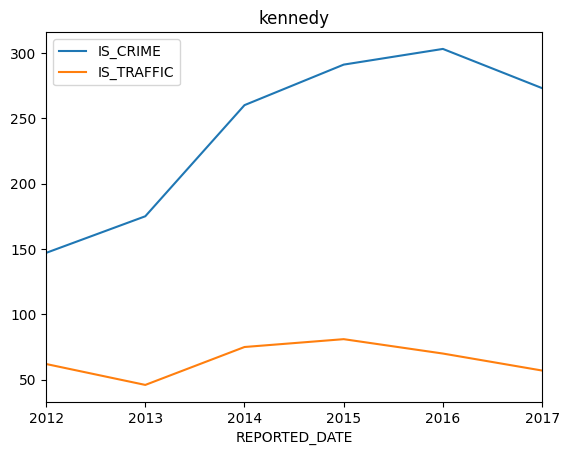

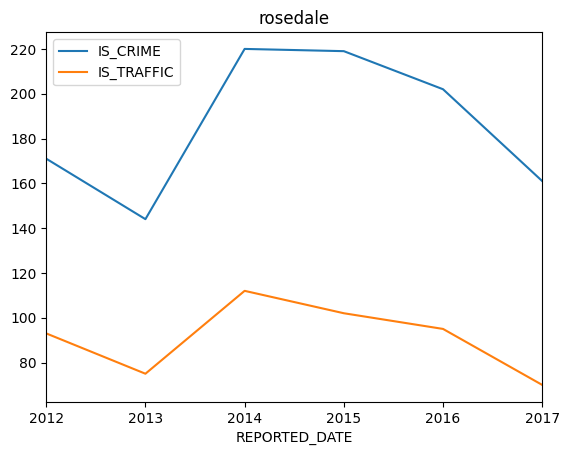

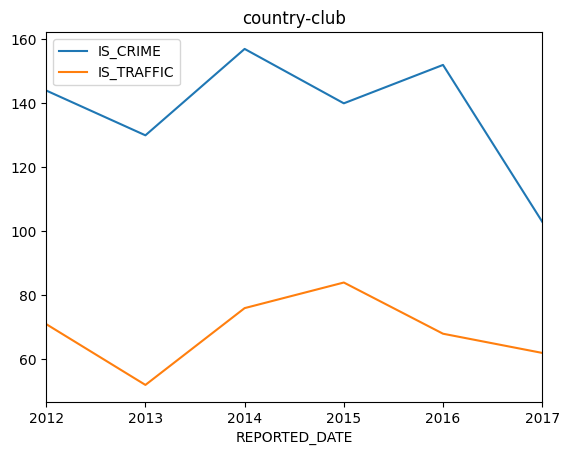

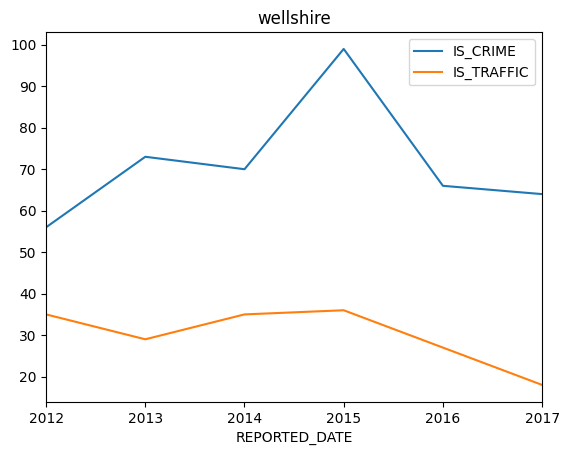

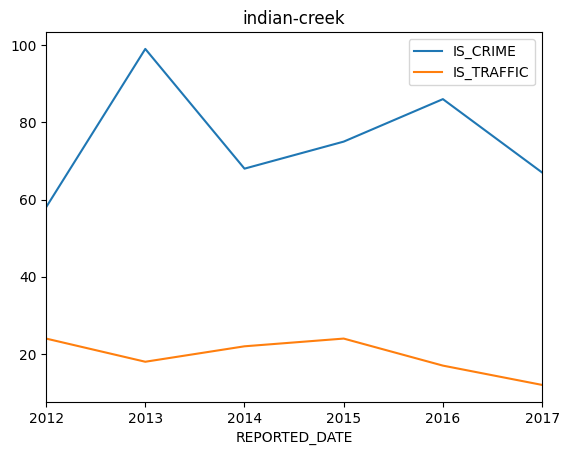

In [ ]:
for n in neighbor :
  crime[crime['NEIGHBORHOOD_ID']==n][['IS_CRIME','IS_TRAFFIC']].resample("Y").sum().plot()
  plt.title(n)



---



In [ ]:
category

['traffic-accident',
 'all-other-crimes',
 'public-disorder',
 'larceny',
 'theft-from-motor-vehicle',
 'drug-alcohol',
 'burglary',
 'auto-theft',
 'other-crimes-against-persons',
 'aggravated-assault',
 'robbery',
 'white-collar-crime',
 'sexual-assault',
 'arson',
 'murder']

In [ ]:
crime.groupby(['DAYOFWEEK','OFFENSE_CATEGORY_ID'])['IS_CRIME'].sum()

DAYOFWEEK  OFFENSE_CATEGORY_ID     
Fri        aggravated-assault           1463
           all-other-crimes            10751
           arson                          72
           auto-theft                   3277
           burglary                     3844
                                       ...  
Wed        robbery                       909
           sexual-assault                523
           theft-from-motor-vehicle     5407
           traffic-accident                0
           white-collar-crime           1145
Name: IS_CRIME, Length: 105, dtype: int64